In [3]:
import pandas as pd

In [6]:
aapl = pd.read_csv('AAPL.csv', index_col='Date', parse_dates=True)

In [8]:
amzn = pd.read_csv('AMZN.csv', index_col='Date', parse_dates=True)

In [9]:
csco = pd.read_csv('CSCO.csv', index_col='Date', parse_dates=True)

In [10]:
ibm = pd.read_csv('IBM.csv', index_col='Date', parse_dates=True)

In [14]:
for stock_df in (aapl, csco, ibm, amzn):
    stock_df['Norm return'] = stock_df['Adj Close'] / stock_df.iloc[0]['Adj Close']

We assume our portfolio will consist of: 35% for Apple, 25% for Cisco, and 20% each for IBM and Amazon.

In [16]:
for stock_df, allocation in zip((aapl, csco, ibm, amzn),[.35,.25,.2,.2]):
    stock_df['Allocation'] = stock_df['Norm return'] * allocation

In [18]:
for stock_df in (aapl, csco, ibm, amzn):
    stock_df['Position'] = stock_df['Allocation']*10000

In [22]:
all_pos = [aapl['Position'], csco['Position'], ibm['Position'], amzn['Position']]


In [24]:

portf_val = pd.concat(all_pos, axis=1)

In [25]:
portf_val.columns = ['AAPL Pos','CSCO Pos','IBM Pos','AMZN Pos']

In [29]:
portf_val['Total Pos'] = portf_val.sum(axis=1)
portf_val.head()

,AAPL Pos,CSCO Pos,IBM Pos,AMZN Pos,Total Pos
Date,,,,,
2016-11-10,3500.000000,2500.000000,2000.000000,2000.000000,10000.000000
2016-11-11,3520.781136,2529.031897,2013.106986,1990.921105,10053.841124
2016-11-14,3432.461757,2529.839022,1974.909826,1937.201978,9874.412582
2016-11-15,3477.919879,2556.451806,1980.651653,2002.316832,10017.340171
2016-11-16,3571.434646,2545.967665,1988.391564,2011.072456,10116.866330


<AxesSubplot:xlabel='Date'>

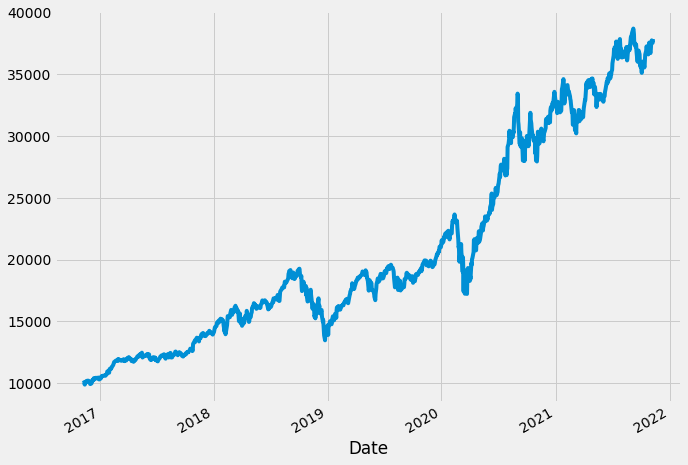

In [30]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
portf_val['Total Pos'].plot(figsize=(10,8))

<AxesSubplot:xlabel='Date'>

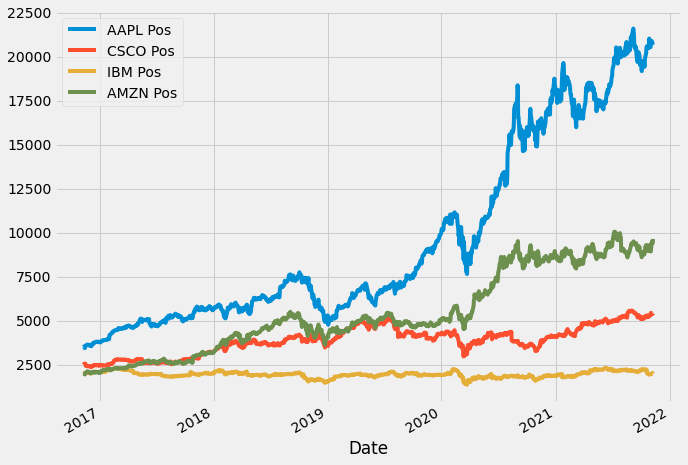

In [32]:
portf_val.drop('Total Pos', axis=1).plot(figsize=(10,8))

In [33]:
cumulative_return = 100 * ( portf_val [ 'Total Pos' ] [-1 ] / portf_val [ 'Total Pos'] [ 0 ] -1)
print('Your cumulative return was {:.2f}% '.format(cumulative_return))

Your cumulative return was 278.41% 


In [34]:
portf_val.tail(1)

,AAPL Pos,CSCO Pos,IBM Pos,AMZN Pos,Total Pos
Date,,,,,
2021-11-09,20809.422338,5412.239369,1984.697579,9634.499733,37840.859018


In [35]:
portf_val['Daily Return'] = portf_val['Total Pos'].pct_change(1)

In [36]:
portf_val

,AAPL Pos,CSCO Pos,IBM Pos,AMZN Pos,Total Pos,Daily Return
Date,,,,,,
2016-11-10,3500.000000,2500.000000,2000.000000,2000.000000,10000.000000,NaN
2016-11-11,3520.781136,2529.031897,2013.106986,1990.921105,10053.841124,0.005384
2016-11-14,3432.461757,2529.839022,1974.909826,1937.201978,9874.412582,-0.017847
2016-11-15,3477.919879,2556.451806,1980.651653,2002.316832,10017.340171,0.014475
2016-11-16,3571.434646,2545.967665,1988.391564,2011.072456,10116.866330,0.009935
...,...,...,...,...,...,...
2021-11-03,20872.790693,5432.026739,1969.731711,9116.624848,37391.173990,0.011142
2021-11-04,20799.764398,5382.087617,1958.562191,9367.170389,37507.584594,0.003113
2021-11-05,20874.275129,5377.376500,2003.292282,9480.293021,37735.236931,0.006070


In [39]:
Sharpe_Ratio = portf_val['Daily Return'].mean() / portf_val['Daily Return'].std()
Sharpe_Ratio

0.07642213729324028

0.07642213729324028

In [40]:
Annual_Sharpe_Ratio = (254**0.5) * Sharpe_Ratio
Annual_Sharpe_Ratio

1.217968447617008